**ASSESSING THE IMPACT OF AGRICULTURAL MANAGEMENT ON SOIL HEALTH AND DROUGHT RESISTANCE**

RANDOM FOREST APPLICATION FOR THE CLASSIFICATION OF VARIABLES BASED ON TREATMENT/MANAGEMENT/TILLAGE

Abdel Alfahham, Matt Ammato

_University of Pennsylvania_,
_Rutgers University_

In [54]:
library("randomForest", lib.loc="~/R/win-library/3.5")
library("readxl")
library("randomForestExplainer", lib.loc="~/R/win-library/3.5")

In [55]:
##File Name
nam <- "SHC_data_current"

##Set path and Read in data from file name
path = "C:\\Users\\Alfahham\\Desktop\\MCMC WRC\\"
file <- paste(nam,".xlsx",sep="")
file <- paste(path,file,sep="")
data = data.frame(read_excel(file))

__________________________________________________________________________________________________________________________________________________________________________________________________________________
Factor = **TILLAGE**

| *Factor* | Feature 10  | Feature 17 |Feature 18 |Feature 31 |Feature 34 |Feature 35 |Feature 36 |Feature 37 |Feature 39 |Feature 42 |
|------|------|------|------|------|------|------|------|------|------|------|
|***TILLAGE***  | SoilBD| C_Field| N_Field| PAW| seki_hm1| seki_sig1| seki_hm2| seki_sig2| AirCap| SSI|



In [50]:
dat.all <- data[,c(6,10,17,18,20,31,34:37,39,42)]
dat.all[,1] <- as.factor(dat.all[,1])

#rfimpute fills up the NAs
dat.all <- rfImpute(Tillage ~.,
                    data=dat.all, 
                    importance=TRUE, 
                    ntree=15000,mtry=3)

fit <- randomForest(Tillage ~.,
                    data=dat.all, 
                    importance=TRUE, 
                    ntree=15000,mtry=3)
##Textoutput##
fit

ntree      OOB      1      2
15000:  36.11% 38.89% 33.33%
ntree      OOB      1      2
15000:  37.50% 41.67% 33.33%
ntree      OOB      1      2
15000:  37.50% 41.67% 33.33%
ntree      OOB      1      2
15000:  37.50% 41.67% 33.33%
ntree      OOB      1      2
15000:  38.89% 44.44% 33.33%



Call:
 randomForest(formula = Tillage ~ ., data = dat.all, importance = TRUE,      ntree = 15000, mtry = 3) 
               Type of random forest: classification
                     Number of trees: 15000
No. of variables tried at each split: 3

        OOB estimate of  error rate: 37.5%
Confusion matrix:
     NT TILL class.error
NT   21   15   0.4166667
TILL 12   24   0.3333333

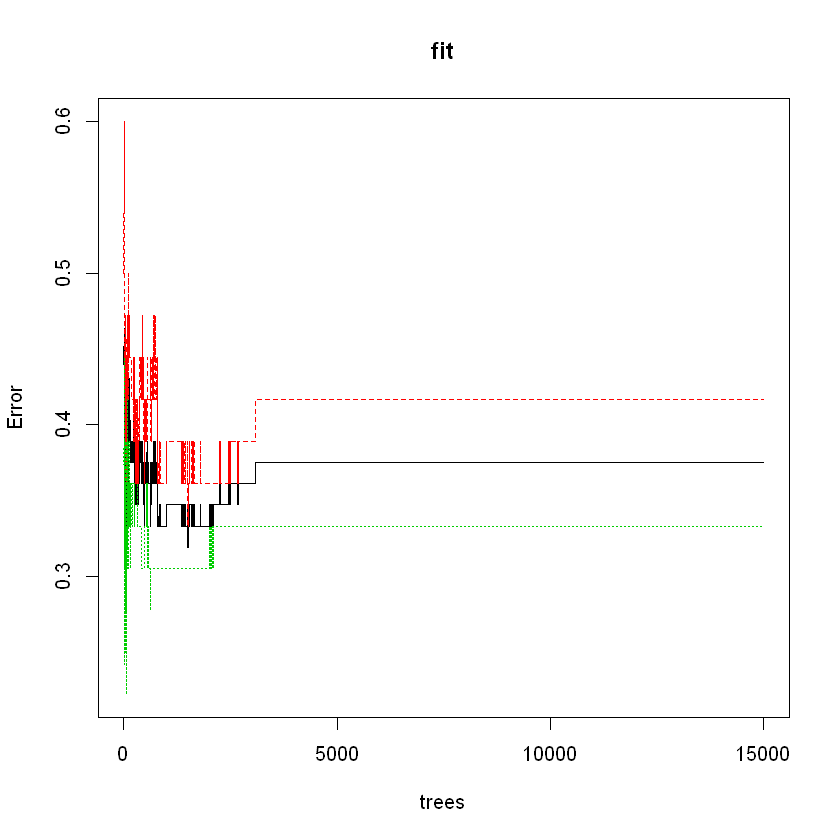

Warning message:
"Factor `split var` contains implicit NA, consider using `forcats::fct_explicit_na`"

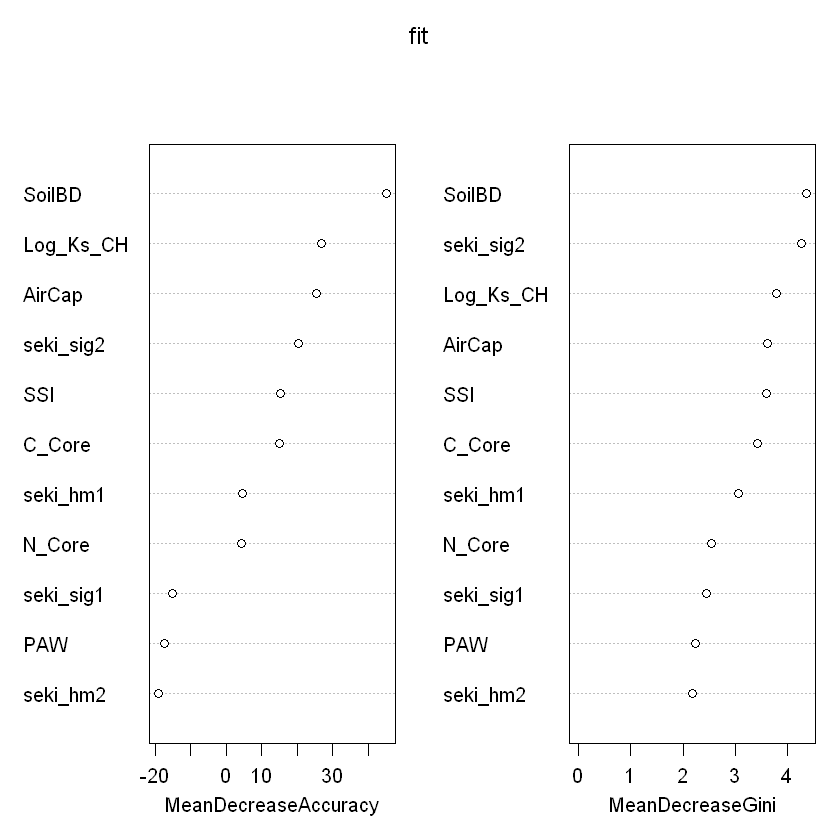

Warning message:
"Factor `split var` contains implicit NA, consider using `forcats::fct_explicit_na`"Warning message:
"Factor `split var` contains implicit NA, consider using `forcats::fct_explicit_na`"

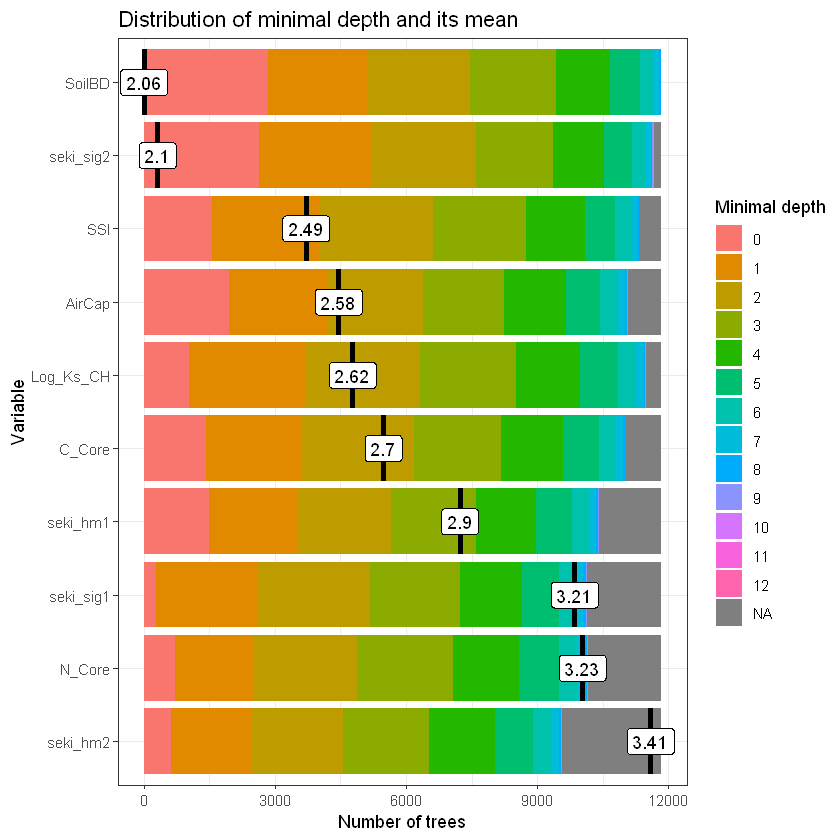

Warning message:
"Factor `split var` contains implicit NA, consider using `forcats::fct_explicit_na`"Warning message:
"Factor `split var` contains implicit NA, consider using `forcats::fct_explicit_na`"Warning message:
"Factor `split var` contains implicit NA, consider using `forcats::fct_explicit_na`"Warning message:
"Factor `split var` contains implicit NA, consider using `forcats::fct_explicit_na`"

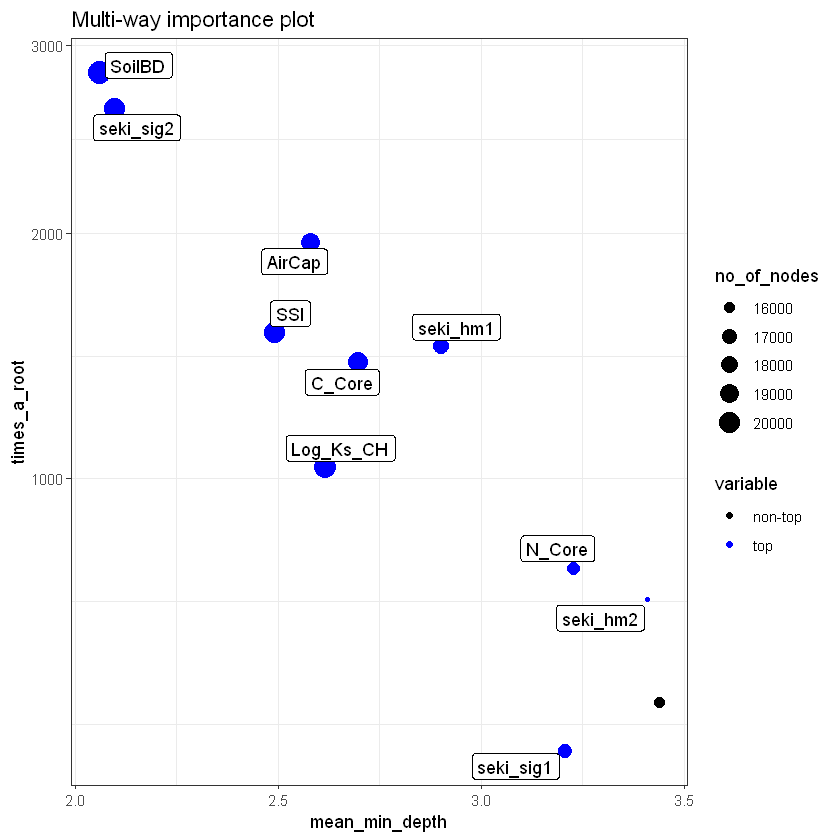

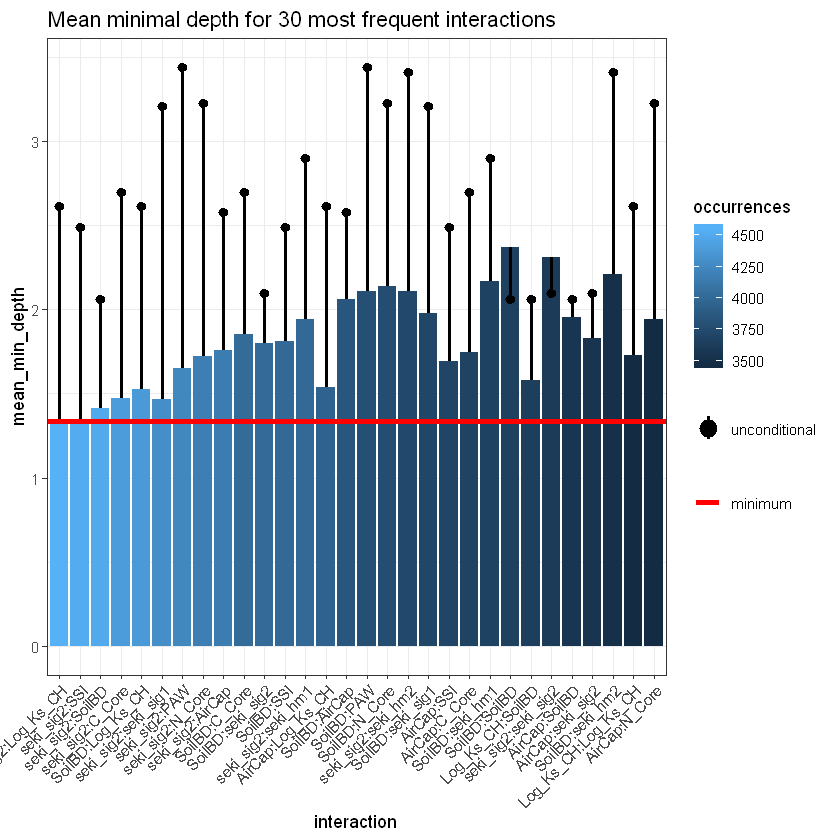

In [59]:
plot(fit)
varImpPlot(fit)
#plotdist of min depth, num of trees
plot_min_depth_distribution(min_depth_distribution(fit))
plot_multi_way_importance(fit, size_measure = "no_of_nodes")
plot_min_depth_interactions(fit)


_________________________________________________________________________________________________________________________________
Factor = **TREATMENT**

| *Factor* | Feature 10  | Feature 18 |Feature 20 |Feature 32 |Feature 33 |Feature 34 |Feature 36 |Feature 37 |Feature 39 |Feature 42 |
|------|------|------|------|------|------|------|------|------|------|------|
|***TREATMENT***  | SoilBD| N_Field| Log_Ks_CH| thetaS| thetaR| seki_hm1| seki_hm2| seki_sig2| seki_hm2| SSI|


ntree      OOB      1      2      3
15000:  48.61% 45.83% 62.50% 37.50%
ntree      OOB      1      2      3
15000:  52.78% 50.00% 70.83% 37.50%
ntree      OOB      1      2      3
15000:  51.39% 45.83% 70.83% 37.50%
ntree      OOB      1      2      3
15000:  50.00% 45.83% 66.67% 37.50%
ntree      OOB      1      2      3
15000:  50.00% 45.83% 66.67% 37.50%


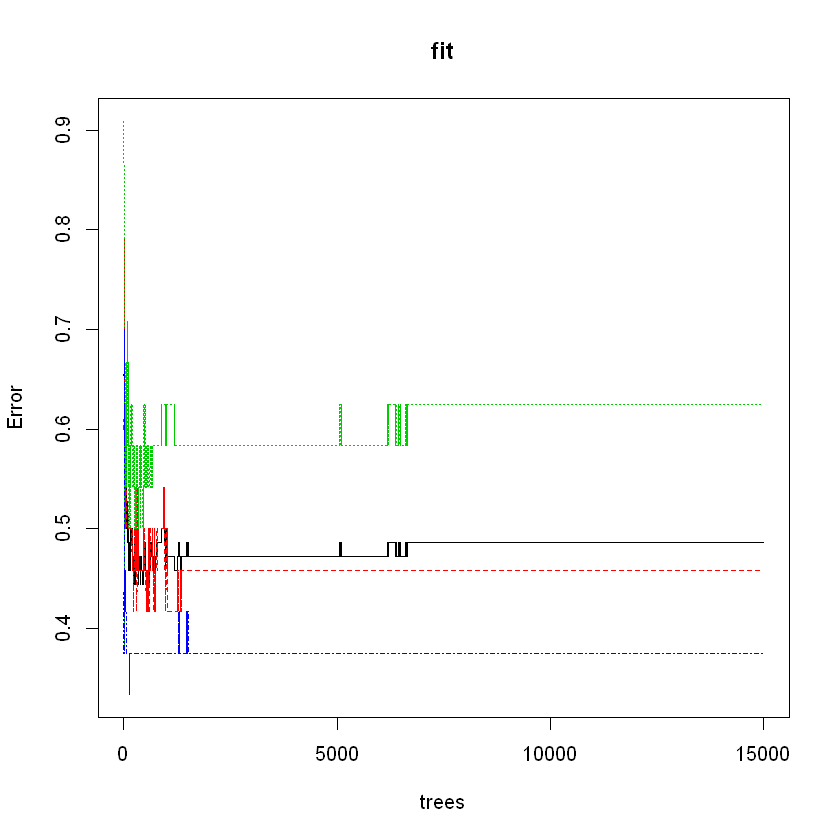

Warning message:
"Factor `split var` contains implicit NA, consider using `forcats::fct_explicit_na`"

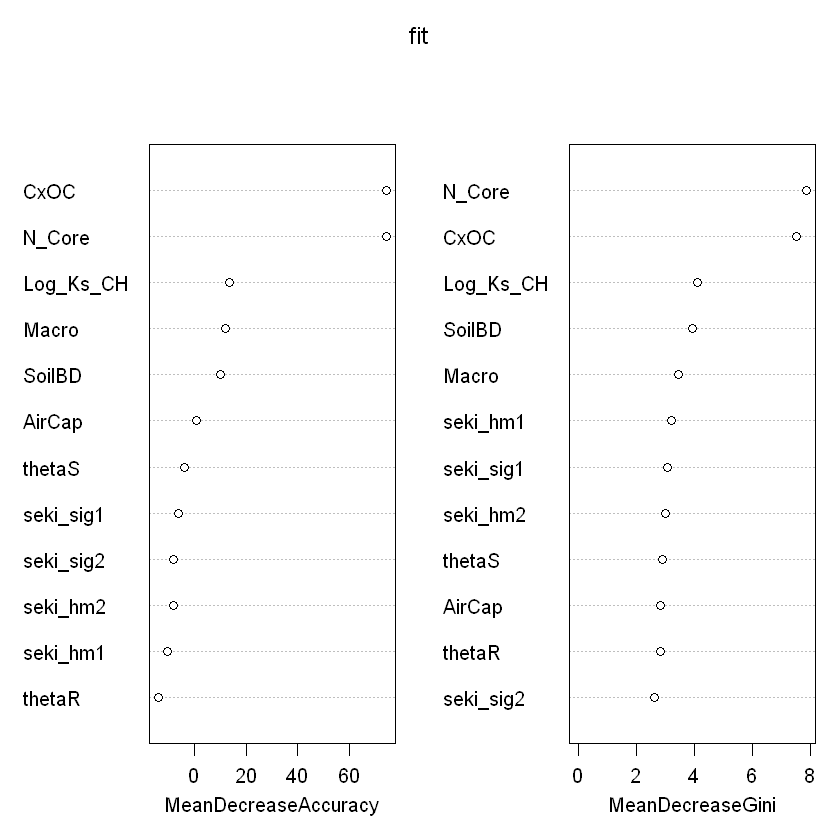

Warning message:
"Factor `split var` contains implicit NA, consider using `forcats::fct_explicit_na`"Warning message:
"Factor `split var` contains implicit NA, consider using `forcats::fct_explicit_na`"

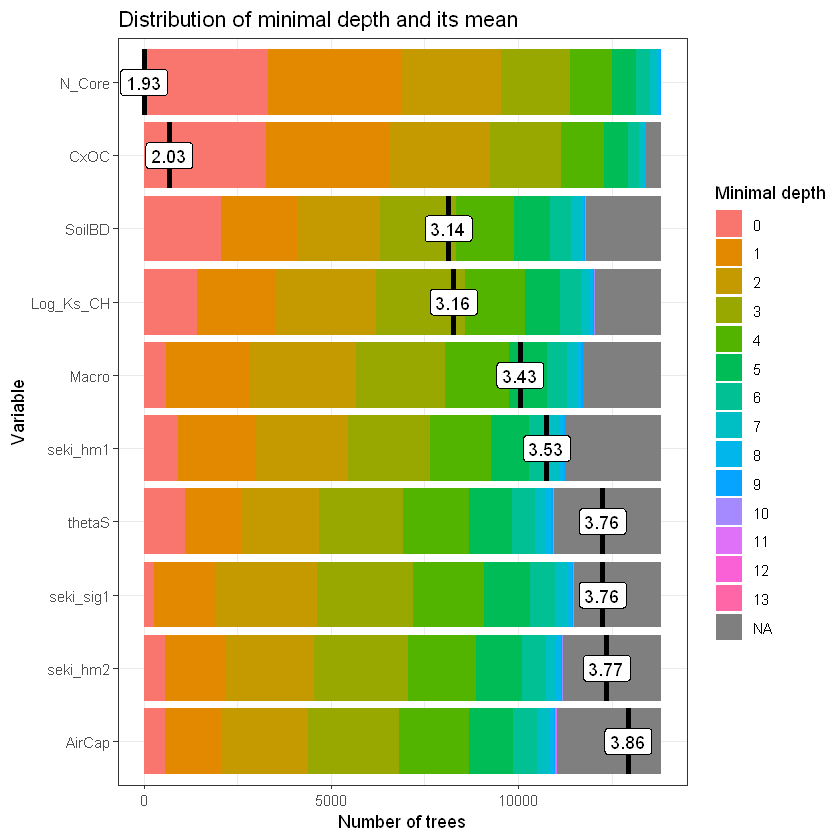

Warning message:
"Factor `split var` contains implicit NA, consider using `forcats::fct_explicit_na`"Warning message:
"Factor `split var` contains implicit NA, consider using `forcats::fct_explicit_na`"Warning message:
"Factor `split var` contains implicit NA, consider using `forcats::fct_explicit_na`"Warning message:
"Factor `split var` contains implicit NA, consider using `forcats::fct_explicit_na`"

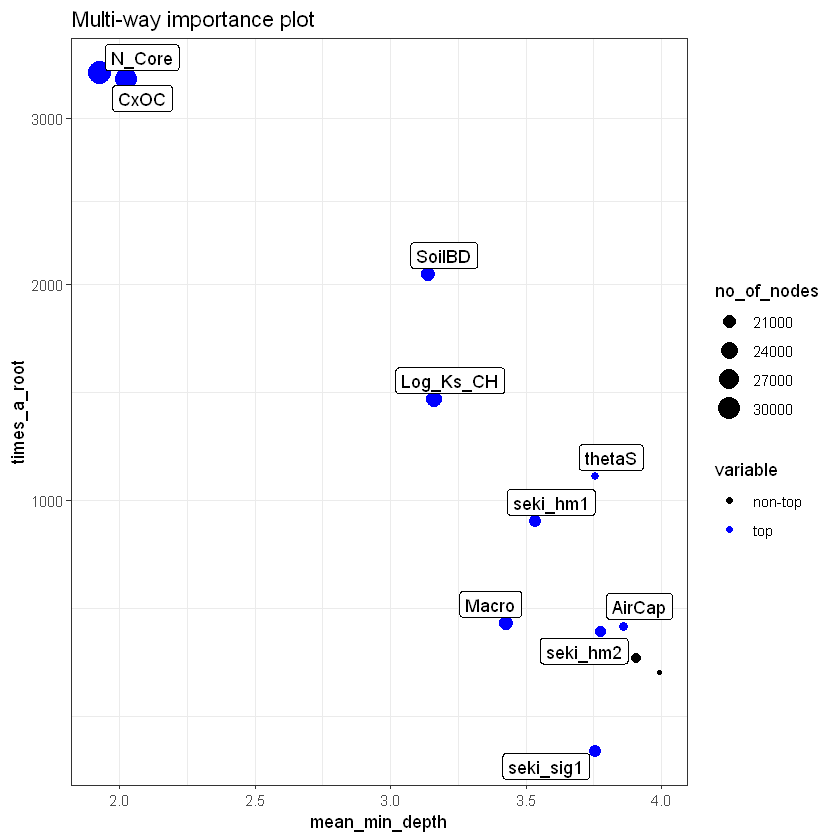

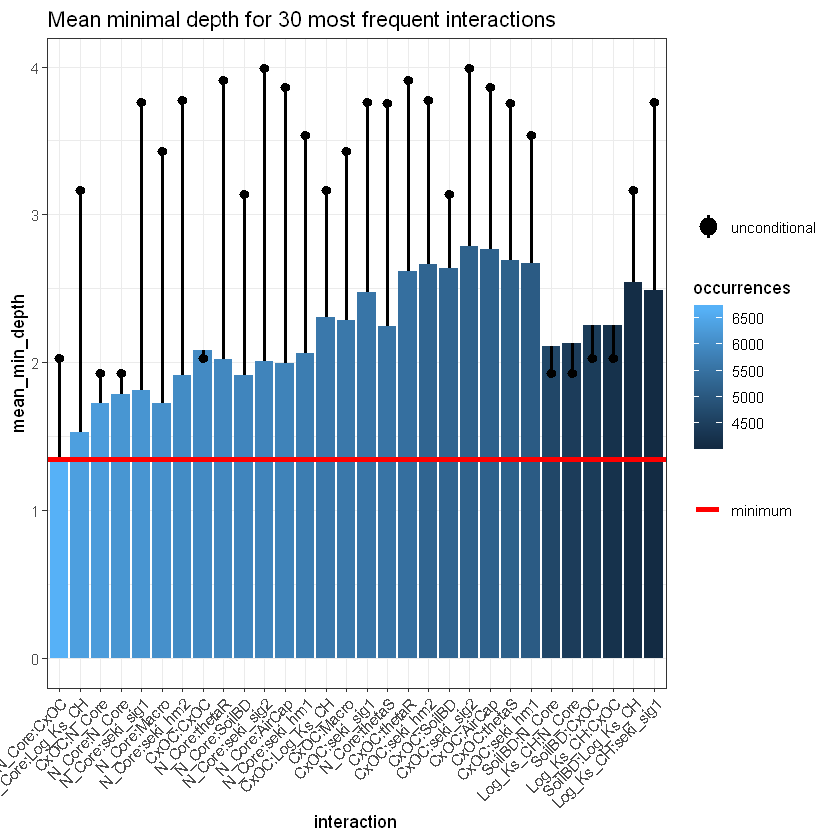

In [60]:
dat.all <- data[,c(5,10,18,20,32:37,39,41,44)]
dat.all[,1] <- as.factor(dat.all[,1])

#rfimpute fills up the NAs
dat.all <- rfImpute(Treatment_str ~.,
                    data=dat.all, 
                    importance=TRUE, 
                    ntree=15000,mtry=3)

fit <- randomForest(Treatment_str ~.,
        data=dat.all, 
        importance=TRUE, 
        ntree=15000,mtry=3)

plot(fit)
varImpPlot(fit)
plot_min_depth_distribution(min_depth_distribution(fit))
plot_multi_way_importance(fit, size_measure = "no_of_nodes")
plot_min_depth_interactions(fit)

_________________________________________________________________________________________________________________________________
Factor = **TREATMENT x TILLAGE**

| *Factor* | Feature 10  | Feature 18 |Feature 20 |Feature 32 |Feature 33 |Feature 34 |Feature 36 |Feature 37 |Feature 39 |Feature 42 |
|------|------|------|------|------|------|------|------|------|------|------|
|***TREAT X TILLAGE***  | SoilBD| N_Field| Log_Ks_CH| thetaS| thetaR| seki_hm1| seki_hm2| seki_sig2| seki_hm2| SSI|

In [ ]:
dat.all <- data[,c(8,9,14,15,29:31)]
dat.all[,1] <- as.factor(dat.all[,1])

#rfimpute fills up the NAs
dat.all <- rfImpute(TrTl ~.,
                    data=dat.all, 
                    importance=TRUE, 
                    ntree=15000,mtry=3)

fit <- randomForest(TrTl ~.,
                    data=dat.all, 
                    importance=TRUE, 
                    ntree=15000,mtry=3)

In [ ]:
dat.all <- data[,c(8,9,14,15,29:31)]
dat.all[,1] <- as.factor(dat.all[,1])


fit <- randomForest(TrTl ~.,
                    data=dat.all, 
      
                    importance=TRUE, 
                    ntree=15000,mtry=3)
plot(fit)
varImpPlot(fit)
plot_min_depth_distribution(min_depth_distribution(fit))
plot_multi_way_importance(fit, size_measure = "no_of_nodes")
plot_min_depth_interactions(fit)